<a href="https://colab.research.google.com/github/ELBrown11/sales_prediction_project/blob/main/Project1_Final_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Food Sales Prediction Project**

The data contains different features related to sales of food items sold a numerous grocery store. We want to help a retailer understand the importance of the different features/properties of the products they're selling. As well as the role of different outlets in increasing the sales of the products.


make predictions about that data collected from their stores

## **Mounting and Importing Data**

In [1]:
#mount data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import pandas library
import pandas as pd
filename = '/content/drive/MyDrive/Coding Dojo Bootcamp/sales_predictions.csv'
#view first 5 rows of data
sales_data = pd.read_csv(filename)


sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


|Column Names | Description of Data |
|:--------|:--------------------|
|Item_Identifier| unique product ID|
|Item_Weight | weight of product|
|Item_Fat_Content| whether the product is low far or regular|
|Item_Visibility| the percentage of total display are of all product in a store allocated to the particular product|
|Item_Type| the category to which the product belongs|
|Item_MRP| maximum retail price (list price) of the product|
|Outlet_Identifier| unique store ID|
|Outlet_Establishment_Year| the year in which store was established|
|Outlet_Size| the size of the store in terms of ground area covered|
|Outlet_Location_Type| the type of are in wich the store is located|
|Outlet_Type| whether the outlet is a grocery store or some sort of supermarket|
|Item_Outlet_Sales| sales of product in the particular store, this is the target to be predicted|





- explanation of the content of each column
- the above shows that the dataframe has 8523 columns and 12 columns

-----------------------
> ### **Hypotheses**
* looking at the content of the columns I intuitively think that `Item_Visibility` may be and important feature in predicting `Item_Outlet_Sales` because you have to see an item to buy it
* `Item_MRP` may also be an important freature because prices of a product usually dictates if and how much of something a consumer will purchase
* as far as outlet based features...
  * `Outlet_Size` and `Outlet_Type` the type of store (grocery or supermarket) probabluy dictates that size of the store and size logically would dictate sales. A larger store should have greater sales
* via explorations of the data and machine learning method we can find out if these hypotheses are in fact correct

## **Data Exploration**

Here I look at what data is missing and duplicated. Then think about the best method for addressing these issues. 

In [3]:
#data exploration of possible missing data 
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


-----------------------
* `Item_Weight` and `Outlet_Size` columns have missing values
  * in order to avoid data leakage we can impute the missing data via `SimpleImputer()`
    * for `Item_Weight` - impute with mean weight of all the items
    * for `Outlet_Size` - impute with mode (most frequent) of all the outlet sizes
-----------------------

In [4]:
#summary statistics foe each numerical column
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


----------------
> ### **Statistical Observations**
* mean for `Item_Weight` $\approx$ 12.86
* mean for `Item_Visibiliy` $\approx$ .066 
  * this seems low, it's at about 6/7%
* mean for`Item_MRP` $\approx$ 140.99, with standard deviation $\approx$ 62.27
  * which means there is a signnificant different betweent the observed values and the mean and therefore significant variation in the data
* mean for `Item_Outlet_Sales` $\approx$ 2181.29 with standard deviation $\approx$ 1706.49 which mean a lot of variation in this data
----------------

In [5]:
#exploration of the types of values in Item Fat Content column
sales_data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

--------------
* there are only 2 types of Fat Contents `Low Fat`, `Regular`
but we see here that there are 3 other labels `LF`, `reg` and `low fat` which mean the same things. 
* these need to be replaces so that there are only two word representing each type of fat content

In [6]:
#replaces abbreviated terms with full phrases
sales_data['Item_Fat_Content'].replace({"reg":"Regular","low fat":"Low Fat", "Low Far":"Low Fat", "LF": "Low Fat"}, inplace=True)
sales_data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [7]:
#explore the types of values in the Item Type column
sales_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

* contains all distinct item names

In [8]:
#exploration of types of values in the Outlet_Type column
sales_data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

> ### **Duplicate Data**

In [9]:
print(f'{sales_data.duplicated().sum()} duplicates')

0 duplicates


### **Exploratory Data Visualization**

In [10]:
#import libraries for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

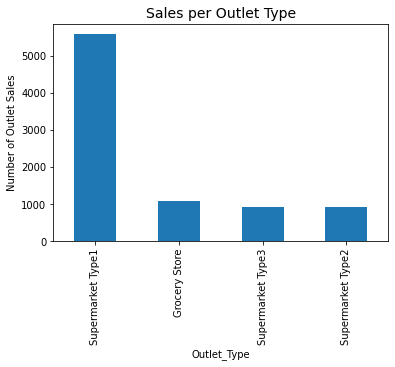

In [11]:
sales_data.groupby(by='Outlet_Type')['Item_Outlet_Sales'].count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of Outlet Sales')
plt.title('Sales per Outlet Type', fontsize=14);

<mark> *plot comparing the outlet type with the number of outlet sales* </mark>

----------
- here we see that supermarket type one has significantly more sales that any of the other types of stores

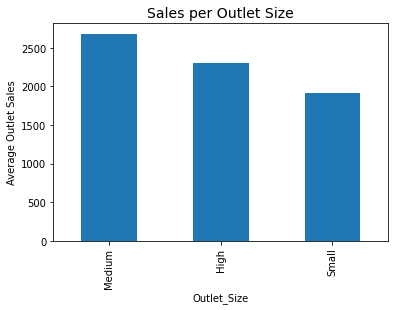

In [12]:
sales_data['Outlet_Size'].value_counts()

sales_data.groupby(by='Outlet_Size')['Item_Outlet_Sales'].mean().sort_values(ascending=False).plot(kind='bar');
plt.ylabel('Average Outlet Sales')
plt.title('Sales per Outlet Size', fontsize=14);

<mark>*plot comparing outlet size and average outlet sales*</mark>

--------

- interestingly the Medium sized stores have the higher average outlet size, in opposition with my original hypothesis
  - althouh the differences aren't very large

- seems like this should be "large" instead of "high"
- let's change that...

In [13]:
#replacing high with large for outlet size column
sales_data['Outlet_Size'].replace({"High":"Large"}, inplace=True)
sales_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

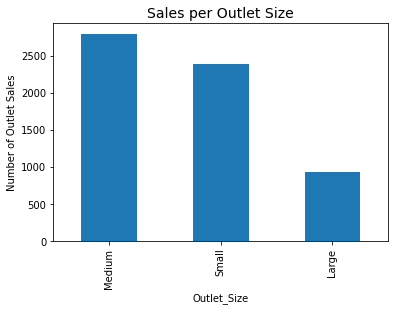

In [14]:
sales_data['Outlet_Size'].value_counts()

sales_data.groupby(by='Outlet_Size')['Item_Outlet_Sales'].count().sort_values(ascending=False).plot(kind='bar');
plt.ylabel('Number of Outlet Sales')
plt.title('Sales per Outlet Size', fontsize=14);

- this shows that of all the sizes store there are more `Medium` and `Small` sized stores than `Large` stores which means that size of the store does not infact dictate the number of sales

## **Exploring Data Types (Continuous v. Categorical)**

In [15]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


- `Item_Identifier`	- categorical
- `Item_Weight`	- continuous
- `Item_Visibility`	- continuous
- `Item_Type`	- categorical
- `Item_MRP` - continous
- `Outlet_Identifier`	- categorical
- `Outlet_Establishment_Year`	- categorical
- `Outlet_Location_Type` - categorical
- `Outlet_Type`	- categorical
- `Item_Outlet_Sales` - continuous

In [16]:
sales_data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

- `Item_Identifier` has 1559 unique values which would each be a column if they would one hot encoded, this column will be dropped

In [17]:
sales_data = sales_data.drop(columns='Item_Identifier')
##sales_data.head()

In [18]:
#import machine learning libraries and methods
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
import numpy as np
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline


In [19]:
#assign Item_Outlet_Sales column as your target and rest of variables as feature matrix
y = sales_data['Item_Outlet_Sales']
X = sales_data.drop(columns='Item_Outlet_Sales')

In [20]:
#create train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## **Preprocessing Data**

In [21]:
#instatiate the selectors for numerical and categorical
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

print('numeric columns are', num_columns)
print('categorical columns are', cat_columns)



numeric columns are ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
categorical columns are ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [22]:
#instantiate imputer with mean strategy
mean_imputer = SimpleImputer(strategy='mean')
#instantiate imputer with most frequent strategy
freq_imputer = SimpleImputer(strategy='most_frequent')
#instantiate one hot encoder
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')


#match transformation to type of column
num_tuple = (mean_imputer, num_selector)
ohe_tuple = (ohe_encoder, cat_selector)
cat_pipe = make_pipeline(freq_imputer,ohe_encoder)
cat_tuple = (cat_pipe, cat_selector)

column_transformer = make_column_transformer(num_tuple,cat_tuple)

In [23]:
#instantiate linear regression
lin_reg = LinearRegression()
#instatiate pipeline
lin_reg_pipe = make_pipeline(column_transformer, lin_reg)


In [24]:
#fit pipeline one the training data
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7fb47e7690>),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7fc8224190>)])),
         

In [25]:
print(f'Train R2 score: {r2_score(y_train, lin_reg_pipe.predict(X_train))}')
print(f'Test R2 score: {r2_score(y_test, lin_reg_pipe.predict(X_test))}')

Train R2 score: 0.5615551419174629
Test R2 score: 0.5671041872384912


* this is a pretty low score but the test and training scores are close to each other so the model is a good fit
* Linear Regression doesn't have as many parameters to tune so maybe another model would be better suited.

In [26]:
#root mean squared error (RMSE)
RMSE_test = np.sqrt(mean_squared_error(y_test, lin_reg_pipe.predict(X_test)))
RMSE_train = np.sqrt(mean_squared_error(y_train, lin_reg_pipe.predict(X_train)))
print(f'Root Mean Squared Error(test): {RMSE_test}')
print(f'Root Mean Squared Error(train): {RMSE_train}')

Root Mean Squared Error(test): 1092.8630817241494
Root Mean Squared Error(train): 1139.1040937388918


* RMSE - measure of magnitude of a set of numbers
* eg. {-2,5, -8, 9,-4} has RMSE: 6.16

## **Model Selection Process**

In this section I try several different regression models. The models are compared using a few different regression metrics to determine which model should be used in production and then will be hyperparameter tuned to predict sales more accurately.

### **Decision Tree Model**

In [34]:
from sklearn.tree import DecisionTreeRegressor

#instantiate decision tree model
dec_tree = DecisionTreeRegressor(random_state=42)
#instatiate pipeline
dt_pipe = make_pipeline(column_transformer, dec_tree)
#fit pipeline one the training data
dt_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7fb47e7690>),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7fc8224190>)])),
         

In [42]:
#root mean squared error (RMSE)
RMSE_test_dt = np.sqrt(mean_squared_error(y_test, dt_pipe.predict(X_test)))
RMSE_train_dt = np.sqrt(mean_squared_error(y_train, dt_pipe.predict(X_train)))
print(f'Root Mean Squared Error(train) Decision Tree: {RMSE_train_dt}')
print(f'Root Mean Squared Error(test) Decision Tree: {RMSE_test_dt}')

Root Mean Squared Error(train) Decision Tree: 5.50728349323243e-15
Root Mean Squared Error(test) Decision Tree: 1500.3626653677372


In [44]:
from sklearn.metrics import r2_score
train_score_dt = r2_score(y_train, dt_pipe.predict(X_train))
test_score_dt = r2_score(y_test, dt_pipe.predict(X_test))
print(f' R2 score (train) Decision Tree: {train_score_dt}')
print(f' R2 score (test) Decision Tree: {test_score_dt}')

 R2 score (train) Decision Tree: 1.0
 R2 score (test) Decision Tree: 0.18408602434746324


### **Bagged Tree**

In [35]:
from sklearn.ensemble import BaggingRegressor

#instantiate bagged tree
bag_tree = BaggingRegressor(random_state=42)
#instantiate pipeline
bt_pipe = make_pipeline(column_transformer, bag_tree)
#fit pipeline on training data
bt_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7fb47e7690>),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7fc8224190>)])),
         

In [36]:
#root mean squared error (RMSE)
RMSE_test_bt = np.sqrt(mean_squared_error(y_test, bt_pipe.predict(X_test)))
RMSE_train_bt = np.sqrt(mean_squared_error(y_train, bt_pipe.predict(X_train)))
print(f'Root Mean Squared Error(test) Bagged Tree: {RMSE_test_bt}')
print(f'Root Mean Squared Error(train) Bagged Tree: {RMSE_train_bt}')

Root Mean Squared Error(test) Bagged Tree: 1131.3167643333556
Root Mean Squared Error(train) Bagged Tree: 492.21730511249837


In [37]:
train_score_bt = r2_score(y_train, bt_pipe.predict(X_train))
test_score_bt = r2_score(y_test, bt_pipe.predict(X_test))
print(f' R2 score (train) bagged tree: {train_score_bt}')
print(f' R2 score (test) bagged tree: {test_score_bt}')

 R2 score (train) bagged tree: 0.9181343126434903
 R2 score (test) bagged tree: 0.5361043286154861


### **Random Forest**

In [40]:
#import library
from sklearn.ensemble import RandomForestRegressor
#instantiate model
rf = RandomForestRegressor(random_state=42)
#random forest pipeline
rf_pipe = make_pipeline(column_transformer, rf)
#fit random forest pipeline
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7fb47e7690>),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7fc8224190>)])),
         

In [39]:
#root mean squared error (RMSE)
RMSE_test = np.sqrt(mean_squared_error(y_test, rf_pipe.predict(X_test)))
RMSE_train = np.sqrt(mean_squared_error(y_train, rf_pipe.predict(X_train)))
print(f'Root Mean Squared Error(test) Random Forest: {RMSE_test}')
print(f'Root Mean Squared Error(train) Random Forest: {RMSE_train}')

Root Mean Squared Error(test) Random Forest: 1102.4803071728284
Root Mean Squared Error(train) Random Forest: 427.5883895709499


In [41]:
train_score_rf = r2_score(y_train, rf_pipe.predict(X_train))
test_score_rf = r2_score(y_test, rf_pipe.predict(X_test))
print(f' R2 score (train) Random Forest: {train_score_rf}')
print(f' R2 score (test) Random Forest: {test_score_rf}')

 R2 score (train) Random Forest: 0.9382211294407168
 R2 score (test) Random Forest: 0.5594516732429615
